In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
scores = pd.read_csv('test_scores.csv')

In [3]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   object 
 2   school_type      2133 non-null   object 
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   object 
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   object 
 8   lunch            2133 non-null   object 
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(3), object(8)
memory usage: 183.4+ KB


In [4]:
print(scores.isnull().sum())

school             0
school_setting     0
school_type        0
classroom          0
teaching_method    0
n_student          0
student_id         0
gender             0
lunch              0
pretest            0
posttest           0
dtype: int64


In [5]:
scores.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [6]:
scores['school_type'].value_counts()

Public        1582
Non-public     551
Name: school_type, dtype: int64

In [7]:
# split public and private schools
public = scores[scores['school_type'] == 'Public']
private = scores[scores['school_type'] == 'Non-public'] 

(0.0, 100.0)

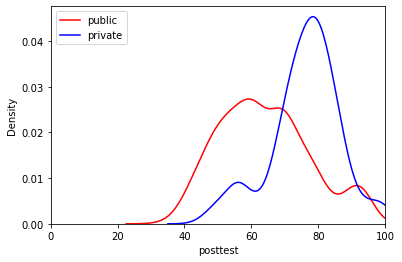

In [26]:
sns.kdeplot(x='posttest', data=public, label='public', color='red')
sns.kdeplot(x='posttest', data=private, label='private', color='blue')
plt.legend()
plt.xlim(0,100)

(0.0, 100.0)

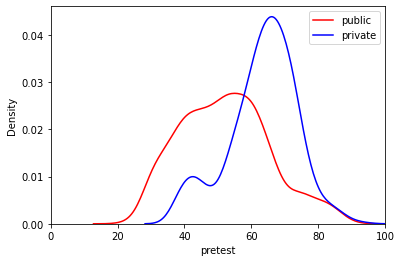

In [25]:
sns.kdeplot(x='pretest', data=public, label='public', color='red')
sns.kdeplot(x='pretest', data=private, label='private', color='blue')
plt.legend()
plt.xlim(0,100)

<AxesSubplot:>

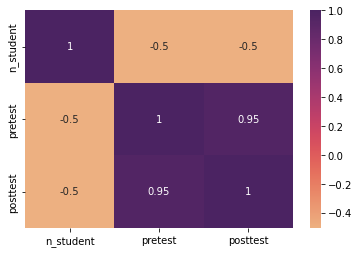

In [36]:
sns.heatmap(scores.corr(), annot=True, cmap='flare')

In [37]:
scores['teaching_method'].value_counts()

Standard        1373
Experimental     760
Name: teaching_method, dtype: int64

In [38]:
exp = scores[scores['teaching_method'] == 'Experimental']
std = scores[scores['teaching_method'] == 'Standard'] 

(0.0, 100.0)

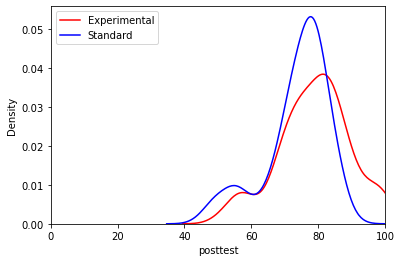

In [135]:
sns.kdeplot(x='posttest', data=exp, label='Experimental', color='red')
sns.kdeplot(x='posttest', data=std, label='Standard', color='blue')
plt.legend()
plt.xlim(0,100)

In [45]:
std = public[public['teaching_method'] == 'Standard']
exp = public[public['teaching_method'] == 'Experimental']

(0.0, 100.0)

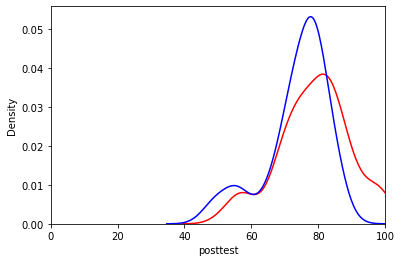

In [137]:
sns.kdeplot(x='posttest', data=exp, label='Experimental', color='red')
sns.kdeplot(x='posttest', data=std, label='Standard', color='blue')
plt.xlim(0,100)

In [47]:
std = private[private['teaching_method'] == 'Standard']
exp = private[private['teaching_method'] == 'Experimental']

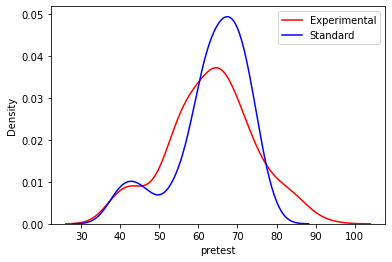

In [48]:
sns.kdeplot(x='pretest', data=exp, label='Experimental', color='red')
sns.kdeplot(x='pretest', data=std, label='Standard', color='blue')
plt.legend()

In [50]:
urban = scores[scores['school_setting'] == 'Urban']
suburban = scores[scores['school_setting'] == 'Suburban']
rural = scores[scores['school_setting'] == 'Rural']

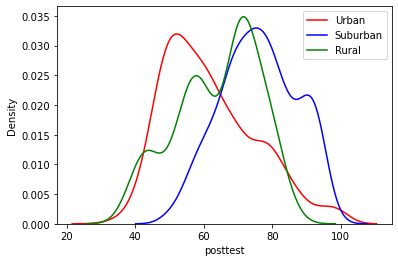

In [138]:
sns.kdeplot(x='posttest', data=urban, label='Urban', color='red')
sns.kdeplot(x='posttest', data=suburban, label='Suburban', color='blue')
sns.kdeplot(x='posttest', data=rural, label='Rural', color='green')
plt.legend()

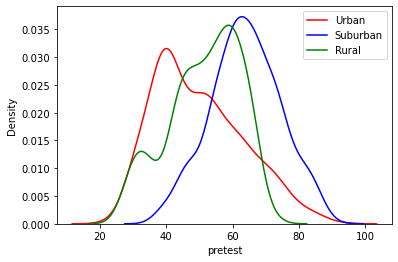

In [139]:
sns.kdeplot(x='pretest', data=urban, label='Urban', color='red')
sns.kdeplot(x='pretest', data=suburban, label='Suburban', color='blue')
sns.kdeplot(x='pretest', data=rural, label='Rural', color='green')
plt.legend()

In [58]:
rural['posttest'].describe()

count    510.000000
mean      64.050980
std       12.093827
min       36.000000
25%       56.000000
50%       67.000000
75%       73.000000
max       88.000000
Name: posttest, dtype: float64

In [59]:
scores['school'].unique()

array(['ANKYI', 'CCAAW', 'CIMBB', 'CUQAM', 'DNQDD', 'FBUMG', 'GJJHK',
       'GOKXL', 'GOOBU', 'IDGFP', 'KFZMY', 'KZKKE', 'LAYPA', 'OJOBU',
       'QOQTS', 'UAGPU', 'UKPGS', 'UUUQX', 'VHDHF', 'VKWQH', 'VVTVA',
       'ZMNYA', 'ZOWMK'], dtype=object)

In [62]:
best_pupils = scores.nlargest(int(len(scores)/2), 'posttest')

<AxesSubplot:xlabel='posttest', ylabel='Density'>

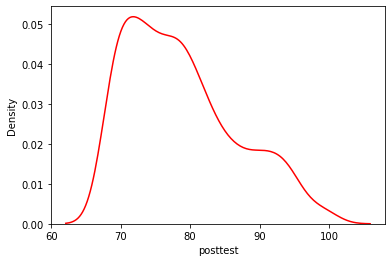

In [63]:
sns.kdeplot(x='posttest', data=best_pupils, label='public', color='red')

In [66]:
best_pupils['school'].value_counts()

UKPGS    128
CCAAW    108
IDGFP     94
UUUQX     82
CIMBB     69
ZMNYA     66
UAGPU     61
DNQDD     58
LAYPA     52
OJOBU     46
FBUMG     46
QOQTS     44
VKWQH     40
GJJHK     39
GOKXL     37
CUQAM     37
ANKYI     33
VHDHF     26
Name: school, dtype: int64

<AxesSubplot:xlabel='posttest', ylabel='Count'>

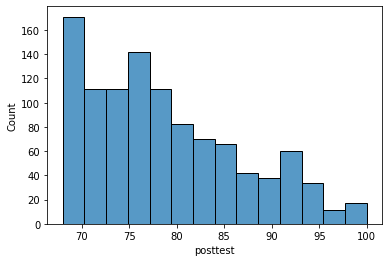

In [70]:
sns.histplot(x='posttest', data=best_pupils)

In [79]:
best_pupils.nlargest(100, 'posttest')['school'].value_counts()

UKPGS    63
IDGFP    28
ZMNYA     9
Name: school, dtype: int64

In [88]:
best_schools = best_pupils[(best_pupils['school'] == 'UKPGS') | (best_pupils['school'] == 'IDGFP') | (best_pupils['school'] == 'ZMNYA')]

(50.0, 100.0)

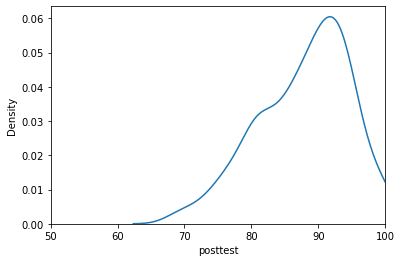

In [89]:
sns.kdeplot(x='posttest', data=best_schools)
plt.xlim(50,100)

<AxesSubplot:xlabel='pretest', ylabel='posttest'>

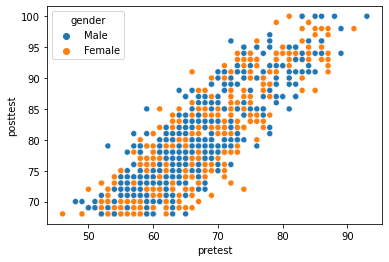

In [92]:
sns.scatterplot(x='pretest', y='posttest', data=best_pupils, hue='gender')

In [98]:
best_pupils.groupby('gender').describe().transpose()

gender               Female        Male
n_student count  527.000000  539.000000
          mean    20.622391   20.634508
          std      3.386917    3.550223
          min     14.000000   14.000000
          25%     18.000000   18.000000
          50%     21.000000   21.000000
          75%     23.000000   23.000000
          max     28.000000   28.000000
pretest   count  527.000000  539.000000
          mean    66.121442   65.263451
          std      8.241856    8.222124
          min     46.000000   48.000000
          25%     60.000000   59.000000
          50%     65.000000   64.000000
          75%     71.000000   70.000000
          max     91.000000   93.000000
posttest  count  527.000000  539.000000
          mean    78.897533   78.621521
          std      7.982451    7.882595
          min     68.000000   68.000000
          25%     72.000000   72.000000
          50%     78.000000   77.000000
          75%     84.000000   83.000000
          max    100.000000  100.000000

In [129]:
# average score by school
scores[['posttest', 'school', 'lunch', 'pretest']].groupby(['school', 'lunch']).median().sort_values('posttest', ascending=False)

,,posttest,pretest
school,lunch,,
UKPGS,Does not qualify,91.0,78.0
IDGFP,Does not qualify,86.0,74.0
ZMNYA,Does not qualify,82.0,68.0
CCAAW,Does not qualify,80.0,66.0
UUUQX,Does not qualify,79.0,68.0
FBUMG,Does not qualify,79.0,64.0
CIMBB,Does not qualify,78.0,66.0
FBUMG,Qualifies for reduced/free lunch,78.0,63.0
CCAAW,Qualifies for reduced/free lunch,76.0,63.0


In [140]:
# average score by school
scores[['posttest', 'school', 'school_type', 'pretest']].groupby(['school', 'school_type']).median().sort_values('posttest', ascending=False)

,,posttest,pretest
school,school_type,,
UKPGS,Public,91.0,78.0
IDGFP,Non-public,86.0,74.0
ZMNYA,Public,81.0,67.0
UUUQX,Non-public,79.0,68.0
FBUMG,Non-public,79.0,63.5
CCAAW,Non-public,78.0,65.0
CIMBB,Non-public,78.0,65.5
LAYPA,Public,72.0,62.0
UAGPU,Public,71.0,63.0


In [130]:
scores['score_diff'] = scores['posttest'] - scores['pretest']

In [131]:
scores['score_diff'].describe()

count    2133.000000
mean       12.146273
std         4.337560
min        -2.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        28.000000
Name: score_diff, dtype: float64

In [134]:
scores.loc[scores['score_diff'] < 0]

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest,score_diff
1976,ZMNYA,Suburban,Public,4NN,Standard,22.0,4KPNR,Female,Does not qualify,74.0,72.0,-2.0


## What have we learnt?
In the first plots, we can clearly see that the scores of childred attending private schools are better than those of their public school fellows. The heatmap clearly shows that there is a strong correlation between pre- and posttest as well as a weak correlation between number of pupils in class and their test scores. The experimental teaching method also seems to be superior but it is important to point out that we did not have as many testing scores of experimental classes. Next, it seems that urban area pupils have overall the worst performance. Suburban areas pupils perform best. For the rest of the analysis, we only look at the 50% of pupils with the best post test scores. We look at their school in order to gain a grasp which schools tend to be better. Then we look at the scores of the best two schools. It seems like that the huge majority of pupils there score 90 points or higher. We also check if there might be a difference of scores depending on gende - seems not to be the case. Lastly, we sort all schools by their corresponding mean score and also check if we can find a pattern between the lunch or school type attribute. Interestingly, all the top schools do not offer any sort of lunch discount. Regarding the school type it is interesting that the best school is public. Nonetheless, from the top schools there are more private than public. The last thing we look at is the average improvement from the pretest to the posttest. On average the pupils have 12 points more on their posttest result. 